# Sentiment Analysis Twitter - Covid 19

### <font color="blue">A. Setting Library</font>

Langkah pertama yang dilakukan adalah melakukan penginstallan library-library yang dibutuhkan pada proses-proses selanjutnya. Di sini, terdapat 8 library yang perlu diinstal. Command yang ada pada kode di bawah ini merupakan command untuk melakukan penginstallan library Jupyter Notebook. Selain menggunakan command "%", bisa juga menggunakan "!" seperti "!pip install pandas". <font color="red">Langkah ini bisa diabaikan apabila library-library berikut sudah terinstal pada environment.</font>

In [ ]:
%pip install pandas
%pip install deep_translator
%pip install nltk
%pip install re
%pip install numpy
%pip install scipy
%pip install transformers
%pip install tensorflow

Selanjutnya, melakukan import untuk library yang dibutuhkan.

- pandas: Library untuk analisis dan manipulasi data dalam bentuk tabel (DataFrame).
- re: Library untuk pemrosesan teks dengan ekspresi reguler.
- nltk (Natural Language Toolkit): Library untuk pemrosesan bahasa alami (Natural Language Processing - NLP) yang menyediakan alat dan sumber daya untuk analisis dan pemrosesan teks dalam bahasa manusia.
- deep_translator: Library untuk terjemahan teks menggunakan layanan Google Translate.
- tqdm: Library untuk membuat tampilan progress bar dalam pengolahan data.
- transformers: Library dari Hugging Face untuk bekerja dengan model bahasa alami dan pemrosesan teks.
- numpy: Library untuk komputasi numerik dalam Python.
- scipy.special: Bagian dari SciPy yang berisi fungsi khusus, seperti softmax.
- csv: Library standar Python untuk membaca dan menulis file CSV.
- urllib.request: Library untuk mengakses dan mengunduh data dari URL.

In [2]:
import pandas as pd
import re
import nltk
from deep_translator import GoogleTranslator
from tqdm import tqdm
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import matplotlib.pyplot as plt

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### <font color="blue">B. Import Dataframe</font>

Dataframe yang digunakan adalah data tweet mengenai Covid-19. Tweet ini dikumpulkan menggunakan Twitter API dan skrip Python. Query untuk mengumpulkan tweet dengan hashtag viral ini (#covid19) dijalankan setiap hari selama jangka waktu tertentu, untuk mengumpulkan sampel tweet dalam jumlah yang lebih besar. Pengumpulan dimulai pada 25/7/2020 dan berlanjut setiap hari.

Link dataset: <https://www.kaggle.com/datasets/gpreda/covid19-tweets>

In [3]:
covid_df = pd.read_csv('covid19_tweets.csv', index_col= False)
covid_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


Karena hanya berfokus pada teks dan tanggal, maka dataframe yang didapatkan bisa disederhanakan menggunakan kode di bawah. Hal ini bertujuan untuk menyederhanakan dataset dan mengeliminasi atribut yang tidak akan dianalisis.

In [4]:
covid_simple_df = covid_df[['date', 'text']]
covid_simple_df

,date,text
0,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...
179103,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...
179104,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...
179105,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...
179106,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO..."


Kode di bawah memiliki tujuan untuk melakukan random sampling (pengambilan sampel acak) dari DataFrame covid_simple_df, yang awalnya memiliki sekitar 180,000 baris data, dengan alasan untuk mengambil sebagian kecil (sekitar 20%) dari data tersebut. Penjelasan langkah-langkahnya:

- `random_seed = 42`: Ini adalah pengaturan biji acak (random seed) dengan nilai 42. Menetapkan biji acak ini memastikan bahwa hasil random sampling akan konsisten jika kode dieksekusi ulang. Dengan kata lain, pengaturan biji acak ini membuat hasil yang dapat direproduksi.
- `sample_size = int(0.20 * len(covid_simple_df))`: Ini adalah langkah perhitungan untuk menentukan ukuran sampel yang diinginkan. Dalam hal ini, sekitar 20% dari total jumlah baris dalam covid_simple_df akan diambil. Hasil dari perhitungan ini disimpan dalam variabel sample_size.
- `random_sample = covid_simple_df.sample(n=sample_size, random_state=random_seed)`: Ini adalah langkah yang sebenarnya untuk melakukan random sampling. Fungsi `.sample()` digunakan untuk mengambil sampel acak dari DataFrame `covid_simple_df`. Parameter n digunakan untuk menentukan jumlah sampel yang diambil, yang diambil dari nilai sample_size yang telah dihitung sebelumnya. Parameter random_state diatur dengan biji acak yang telah ditentukan sebelumnya (42) untuk memastikan hasil yang konsisten. Hasil random sampling disimpan dalam DataFrame random_sample.

Alasan untuk melakukan random sampling adalah untuk mengambil sejumlah kecil data yang merupakan subset representatif dari data awal yang lebih besar. Ini sering digunakan dalam analisis data untuk mengurangi waktu komputasi dan sumber daya yang dibutuhkan saat bekerja dengan data yang besar. Dalam kasus ini, kita mengambil sekitar 20% data secara acak sebagai contoh yang lebih kecil untuk analisis lebih lanjut.

In [5]:
random_seed = 42
sample_size = int(0.20 * len(covid_simple_df))
random_sample = covid_simple_df.sample(n=sample_size, random_state=random_seed)
random_sample

,date,text
20213,2020-07-26 06:55:54,The latest The British Landlord Association Da...
148810,2020-08-18 18:02:45,#COVID19 has affected business owners and work...
10763,2020-07-25 05:09:23,July 24: #Thane city #COVID19 update\nNew case...
30395,2020-07-27 03:03:04,#COVID19\nGlobal overnight developments from 2...
69398,2020-08-04 06:39:22,Theatre can respond to the gendered impacts of...
...,...,...
48340,2020-07-31 18:09:41,Dr. Ezequiel Molina and Dr. Maria Rodrigo are ...
4727,2020-07-25 09:30:50,Idiotic people and clueless governance is a le...
9700,2020-07-25 05:57:35,@emirates will cover customers if they contact...
48955,2020-07-31 18:00:24,The UK suspends it lock down ease plans follow...


Mengurutkan berdasarkan tanggal tweet dibuat:

In [6]:
random_sample = random_sample.sort_values(by="date")
random_sample

,date,text
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass..."
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac..."
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...
...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...


### <font color="blue">C. Text Preprocessing</font>

#### 1. Text Cleaning

Kode di bawah digunakan untuk mengunduh daftar kata-kata berhenti (stop words) dalam bahasa Inggris menggunakan library nltk dan menyimpannya dalam variabel en_stopwords, yang nantinya dapat digunakan untuk menghapus kata-kata umum yang tidak memiliki nilai penting dalam pemrosesan teks.

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a set of stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kode di bawah adalah sebuah fungsi Python yang melakukan pra-pemrosesan (preprocessing) pada teks tweet. Fungsi ini melakukan langkah-langkah berikut:

- Menggantikan karakter newline ('\n') dengan spasi kosong untuk menghapus baris baru.
- Memisahkan teks menjadi token-token (kata-kata) dengan menggunakan spasi sebagai pemisah.
- Menghapus kata-kata yang dimulai dengan karakter '@' (menghapus username).
- Menghapus kata-kata yang dimulai dengan karakter '#' (menghapus hashtag).
- Menghapus kata-kata yang dimulai dengan 'http' atau 'www.' (menghapus URL).
- Menggantikan karakter '/' dengan spasi kosong.
- Menghilangkan spasi ekstra di antara kata-kata.
- Mengembalikan teks yang telah dipreproses.

Dengan demikian, fungsi ini membersihkan teks tweet dari elemen-elemen yang umumnya tidak relevan atau diinginkan dalam analisis teks, seperti karakter newline, username, hashtag, dan URL.

In [8]:
def preprocess_tweet(text):
    text = text.replace('\n', ' ')  # Remove every '\n'
    # text = text.replace('rt', ' ')  # Remove every retweet symbol
    tokens = text.split()
    # Remove usernames
    tokens = [token if not token.startswith('@') else ' ' for token in tokens]
    # Remove hashtags
    tokens = [token if not token.startswith('#') else ' ' for token in tokens]
    # Remove URLs
    tokens = [token if not token.startswith('http') and not token.startswith('www.') else ' ' for token in tokens]
    text = ' '.join(tokens)
    text = text.replace('/', ' ')
    text = ' '.join(text.split())  # Remove extra spaces
    return text

Kode di bawah adalah sebuah fungsi Python yang bertujuan untuk membersihkan teks dengan cara menghapus karakter-karakter non-alphanumeric (selain huruf dan angka) kecuali tanda titik (.) dan tanda koma (,). Fungsi ini melakukan langkah-langkah berikut:

- Menggantikan karakter '&amp;' dengan spasi kosong.
- Memisahkan teks menjadi token-token (kata-kata) dengan menggunakan spasi sebagai pemisah.
- Menghapus karakter non-alphanumeric kecuali tanda titik (.) dan tanda koma (,).
- Menggantikan spasi ekstra di antara kata-kata dengan satu spasi.
- Mengembalikan teks yang telah dipreproses.

Dengan demikian, fungsi ini membersihkan teks dari karakter-karakter khusus yang tidak relevan dalam analisis teks, kecuali tanda titik dan tanda koma yang sering digunakan dalam teks bahasa alami.

In [9]:
def remove_nonaplhanumeric(text):
    text = text.replace('&amp;', ' ')
    # Remove non-alphanumeric characters except for ., and !
    tokens = text.split()
    tokens = [token if token.isalnum() or token in ['.', ','] else ' ' for token in tokens]
    text = ' '.join(tokens)
    text = ' '.join(text.split())  # Remove extra spaces
    return text

Kode di bawah adalah sebuah fungsi Python yang melakukan beberapa tahap pra-pemrosesan pada teks. Fungsi ini melakukan langkah-langkah berikut:

- Menggantikan tanda titik (.), tanda koma (,), dan tanda seru (!) dengan spasi kosong, sehingga karakter-karakter ini dihapus dari teks.
- Memisahkan teks menjadi token-token (kata-kata) dengan menggunakan spasi sebagai pemisah.
- Menghapus kata-kata berhenti (stopwords) dalam bahasa Inggris (menggunakan en_stopwords) dari teks. Kata-kata berhenti adalah kata-kata umum yang seringkali tidak memiliki nilai penting dalam analisis teks.
- Menggantikan kata-kata yang telah dihapus dengan spasi kosong.
- Menghapus spasi atau baris baru yang mungkin ada di awal atau akhir teks.
- Mengembalikan teks yang telah dipreproses.

Dengan langkah-langkah ini, fungsi tersebut membersihkan teks dari karakter khusus dan kata-kata berhenti dalam bahasa Inggris, serta mengonversi teks ke format huruf kapital yang konsisten.

In [10]:
def remove_stopword(text):
    text = text.replace('.', '').replace(',', '').replace('!', '')  # Remove ., and !
    tokens = text.split()
    # Remove stopwords
    tokens = ['' if token in en_stopwords else token for token in tokens]
    text = ' '.join(tokens)
    text = text.strip()  # Remove leading/trailing spaces or newlines
    return text

Kode di bawah adalah sebuah fungsi Python yang bertujuan untuk menghapus spasi ganda dalam teks. Fungsi ini menggunakan ekspresi reguler (re.sub()) untuk mencari dan menggantikan setiap kemunculan spasi ganda atau lebih dengan satu spasi tunggal. Hasilnya adalah teks yang tidak mengandung spasi berlebihan di antara kata-kata atau karakter-karakter.

In [11]:
def remove_doublespace(text):
    text = re.sub(r'\s+', ' ', text)
    return text

Kode di bawah adalah sebuah fungsi preprocess yang merupakan gabungan dari fungsi-fungsi sebelumnya. Ini melibatkan beberapa tahap:

- `text.lower()`: Fungsi ini mengonversi semua huruf dalam teks menjadi huruf kecil untuk konsistensi.
- `preprocess_tweet(text)`: Memanggil fungsi preprocess_tweet untuk membersihkan teks dari elemen-elemen seperti retweet symbol, username, hashtag, dan URL.
- `remove_nonaplhanumeric(text)`: Memanggil fungsi remove_nonaplhanumeric untuk menghapus karakter-karakter non-alphanumeric kecuali tanda titik dan tanda koma.
- `remove_doublespace(text)`: Memanggil fungsi remove_doublespace untuk menghapus spasi ganda di antara kata-kata atau karakter-karakter.

In [12]:
def preprocess(text):
    text = text.lower() # Mengecilkan semua hurufnya dahulu agar lebih mudah
    text = preprocess_tweet(text)
    text = remove_nonaplhanumeric(text)
    text = remove_doublespace(text)
    return text

#### 2. Translate to English

Kode berikut adalah sebuah fungsi Python yang menggunakan library deep_translator untuk menerjemahkan teks dari bahasa sumber (source) ke bahasa target (target).

- `GoogleTranslator(source='auto', target='en')` adalah objek GoogleTranslator yang digunakan untuk melakukan terjemahan. Parameter source digeset sebagai 'auto', yang berarti library akan mencoba mendeteksi bahasa sumber secara otomatis. Parameter target digeset sebagai 'en', yang berarti teks akan diterjemahkan ke bahasa Inggris.
- `translate(text)` adalah fungsi yang menerima teks sebagai input. Fungsi ini menggunakan GoogleTranslator untuk menerjemahkan teks dari bahasa sumber ke bahasa target.

In [13]:
def translate(text):
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated

#### 3. Handling Slang Words (Singkatan)

Slang words merupakan singkatan/kata-kata/tanda yang sering digunakan untuk mengekspresikan sesuatu secara singkat. Hal ini perlu diatasi dalam salah satu proses pembersihan teks agar teks dapat dianalisis secara lebih lanjut. Di sini, digunakan slangs.csv yang merupakan file kumpulan slang words dalam bahasa Inggris. File ini didapatkan dari link GitHub berikut <https://github.com/bodhwani/NLP-VIT-BOT/blob/master/slangs.csv>.

In [14]:
slang = pd.read_csv('slangs.csv', index_col=0, encoding='latin-1', header=1)
slang

,Slag,Meaning
0,,
1,#1,Number one
2,$,Dollar
3,$_$,Has money
4,%),Drunk
5,&,And
...,...,...
7652,|O|,LOL
7653,}:-),Devilish smile
7654,~,Denotes Sarcasm


Melakukan penggantian nama kolom pada dataframe slang words.

In [15]:
slang['Slag'] = slang['Slag'].str.lower()
slang = slang.rename(columns={'Slag': 'original', 
                                      'Meaning': 'replacement'})
slang = slang.reset_index(drop=True)
slang

,original,replacement
0,#1,Number one
1,$,Dollar
2,$_$,Has money
3,%),Drunk
4,&,And
...,...,...
7651,|o|,LOL
7652,}:-),Devilish smile
7653,~,Denotes Sarcasm
7654,â®,Registered Trademark Symbol


Kode di bawah berfungsi untuk mengecek dataframe slang words pada baris ke 7090-7094 dan ditemukan satu kata yang perlu dihilangkan, yaitu "we" karena kata ini juga memiliki arti lain dalam bahasa Inggris.

In [16]:
slang[7090:7095]

,original,replacement
7090,wdywtta,What Do You Want To Talk About
7091,we,Whatever
7092,web,World wide web
7093,weba,Welcome Back
7094,webinar,Web based seminar


In [17]:
slang.drop(7091, inplace=True)
slang = slang.reset_index(drop=True)
slang

,original,replacement
0,#1,Number one
1,$,Dollar
2,$_$,Has money
3,%),Drunk
4,&,And
...,...,...
7650,|o|,LOL
7651,}:-),Devilish smile
7652,~,Denotes Sarcasm
7653,â®,Registered Trademark Symbol


Kode di bawah berhubungan dengan normalisasi teks yang mungkin mengandung kata-kata slang atau singkatan yang perlu diubah menjadi bentuk standar.

- `slang_map` adalah sebuah dictionary yang dibuat dengan memasangkan kata-kata slang asli dengan kata-kata penggantinya. Ini dilakukan dengan menggunakan fungsi zip untuk menggabungkan dua kolom dari sebuah DataFrame (dalam hal ini, `slang['original']` adalah kata-kata slang asli dan `slang['replacement']` adalah kata-kata penggantinya).
- `normalize_slang(text)` adalah sebuah fungsi yang menerima teks sebagai input. Fungsi ini memisahkan teks menjadi kata-kata individual, dan jika sebuah kata termasuk dalam slang_map, maka kata tersebut akan diganti dengan kata pengganti yang sesuai. Jika kata tersebut tidak ada dalam slang_map, maka kata tersebut tetap dipertahankan.

In [18]:
slang_map = dict(zip(slang['original'], slang['replacement']))

def normalize_slang(text):
    return ' '.join([slang_map[word] if word in slang_map else word for word in text.split(' ')])

### 4. Text Stemming

Stemming adalah proses dalam pemrosesan teks yang bertujuan untuk menghilangkan infleksi kata atau akhiran kata sehingga hanya sisa akar (root) dari kata tersebut. Misalnya, kata-kata seperti "running," "runner," dan "ran" akan diubah menjadi akar kata "run."

Penjelasan kode di bawah ini mengenai stemming:
- `nltk.download('punkt')`: Ini adalah perintah yang digunakan untuk mengunduh sumber daya yang diperlukan oleh NLTK, termasuk tokenisasi (menguraikan teks menjadi kata-kata) untuk pemrosesan teks.
- `def stem_text(text)`: Ini adalah deklarasi fungsi yang menerima teks sebagai input dan akan mengembalikan teks yang sudah di-stem.
- `stemmer = PorterStemmer()`: Ini inisialisasi stemmer Porter dari library NLTK.
- `words = nltk.word_tokenize(text)`: Ini mengurai teks menjadi kata-kata individu menggunakan tokenisasi NLTK.
- `stemmed_words = [stemmer.stem(word) for word in words]`: Ini melakukan stemming pada setiap kata dalam teks menggunakan stemmer Porter. Hasilnya adalah daftar kata-kata yang sudah di-stem.
- `stemmed_text = ' '.join(stemmed_words)`: Ini menggabungkan kata-kata yang sudah di-stem kembali menjadi satu teks dengan spasi sebagai pemisah.
- `return stemmed_text`: Fungsi mengembalikan teks yang sudah di-stem.

In [19]:
nltk.download('punkt')
from nltk.stem import PorterStemmer

def stem_text(text):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <font color="blue">D. Perform Text Preprocessing</font>

#### 1. Preprocess Awal

Kode di bawah digunakan untuk membersihkan dan memproses teks pada kolom "text" dalam sebuah DataFrame (dalam hal ini random_sample) dan menyimpan hasilnya dalam kolom baru yang disebut "text_clean." 

In [20]:
random_sample["text_clean"] = random_sample["text"].apply(preprocess)
random_sample

,date,text,text_clean
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,i was bored so i made this
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",this the commission passed and revised a local...
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac...",americans are dying each day of and that son o...
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...,cdc guidelines push to reopen schools with soc...
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...,has killed the for millions of and is responsi...
...,...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...,talks and looking at prevention
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...,85544 total confirmed cases of in the and 677 ...
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...,we believe and we confess that satan has no po...
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...,hearing a lot about what a great piece this is...


#### 2. Mengenai Translate Text

Pada proses analisis kali ini, tidak dilakukan translate text secara keseluruhan (dalam 35,821 rows data) dikarenakan beberapa alasan sebagai berikut.

- Jumlah data sangat banyak (35,821 data) sehingga melakukan translate secara keseluruhan akan memakan waktu yang sangat lama. Estimasi waktunya adalah sekitar 17 ribu detik atau sekitar 4 jam lebih (hal ini dikarenakan library membutuhkan waktu yang lama, yaitu sekitar 2 iteration per second, sehingga 1 detiknya hanya bisa men-translate 2 data.
- Teks yang ada dalam dataset mayoritas sudah dalam berbahasa Inggris, sehingga translate dari teks tersebut akan sama saja.

Di sini, saya juga akan mendemonstrasikan translate dataset text, tetapi dengan sampling sebanyak 10 data saja untuk memperlihatkan bahwa fungsi translate yang saya buat bisa berjalan.

Sampling 10 rows:

In [21]:
new_random_seed = 123
new_sample_size = 10
new_random_sample = random_sample.sample(n=new_sample_size, random_state=new_random_seed)
new_random_sample

,date,text,text_clean
130460,2020-08-14 02:58:29,@BradMossEsq @lawcrimenews Do in person #Early...,do in person as it gets counted on
169748,2020-08-30 06:20:58,Who gonna play with those toys if children of ...,who gonna play with those toys if children of ...
74642,2020-08-06 16:37:19,@SamirBecic @FOX26RUBEN We hope you will join ...,we hope you will join us in the noble cause of...
173506,2020-08-30 02:00:06,The industry can greatly benefit from real-tim...,the industry can greatly benefit from remote v...
15476,2020-07-25 01:00:36,Great Plates Delivered is a partnership betwee...,great plates delivered is a partnership betwee...
15342,2020-07-25 01:06:13,Georgia has the most new hospitalisations per ...,georgia has the most new hospitalisations per ...
103708,2020-08-11 09:52:25,@AskAnshul @thirumarant When i read this tweet...,when i read this my mind think of a fwd msg fr...
134369,2020-08-16 07:56:16,It is lovely to see photos of people getting t...,it is lovely to see photos of people getting t...
176826,2020-08-29 21:52:14,The COVID-19 pandemic has been devastating but...,the pandemic has been devastating but served a...
71205,2020-08-04 05:25:59,Tongai Mnangagwa who was in charge of this mil...,tongai mnangagwa who was in charge of this mil...


Kode ini digunakan untuk menerjemahkan teks dan mengonversinya ke huruf kecil, serta menampilkan hasilnya. Kode ini juga memanfaatkan tqdm untuk melacak kemajuan proses, terutama saat menerjemahkan teks.

In [22]:
tqdm.pandas(total=len(new_random_sample))
new_random_sample['text_translated'] = new_random_sample['text_clean'].progress_apply(lambda text: translate(text).lower())
tqdm._instances.clear()

new_random_sample['text_translated'] = new_random_sample['text_translated'].str.lower()
new_random_sample

100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


,date,text,text_clean,text_translated
130460,2020-08-14 02:58:29,@BradMossEsq @lawcrimenews Do in person #Early...,do in person as it gets counted on,do in person as it gets counted on
169748,2020-08-30 06:20:58,Who gonna play with those toys if children of ...,who gonna play with those toys if children of ...,who gonna play with those toys if children of ...
74642,2020-08-06 16:37:19,@SamirBecic @FOX26RUBEN We hope you will join ...,we hope you will join us in the noble cause of...,we hope you will join us in the noble cause of...
173506,2020-08-30 02:00:06,The industry can greatly benefit from real-tim...,the industry can greatly benefit from remote v...,the industry can greatly benefit from remote v...
15476,2020-07-25 01:00:36,Great Plates Delivered is a partnership betwee...,great plates delivered is a partnership betwee...,great plates delivered is a partnership betwee...
15342,2020-07-25 01:06:13,Georgia has the most new hospitalisations per ...,georgia has the most new hospitalisations per ...,georgia has the most new hospitalisations per ...
103708,2020-08-11 09:52:25,@AskAnshul @thirumarant When i read this tweet...,when i read this my mind think of a fwd msg fr...,when i read this my mind think of a fwd msg fr...
134369,2020-08-16 07:56:16,It is lovely to see photos of people getting t...,it is lovely to see photos of people getting t...,it is lovely to see photos of people getting t...
176826,2020-08-29 21:52:14,The COVID-19 pandemic has been devastating but...,the pandemic has been devastating but served a...,the pandemic has been devastating but served a...
71205,2020-08-04 05:25:59,Tongai Mnangagwa who was in charge of this mil...,tongai mnangagwa who was in charge of this mil...,tongai mnangagwa who was in charge of this mil...


Bisa dilihat bahwa text bisa di-translate, dan hasilnya juga sama saja menggunakan bahasa Inggris. Sehingga, melakukan translate untuk semua baris akan memakan waktu yang bisa digunakan untuk perform proses lain sehingga tidak efektif.

#### 3. Pembersihan Slang Words

Kode di bawah digunakan untuk melakukan penghapusan kata slang (istilah atau frasa yang tidak formal atau non-standar) dalam teks dan mengonversi teks ke huruf kecil pada DataFrame random_sample. Berikut penjelasan lebih detail:

`random_sample['text_no_slang'] = random_sample['text_clean'].apply(normalize_slang)`: Ini adalah langkah pertama yang menghasilkan kolom baru dengan nama "text_no_slang." Penjelasan lebih rinci:

- `random_sample['text_clean']` adalah kolom "text_clean" dalam DataFrame random_sample, yang berisi teks yang telah di-preproses.
- `.apply(normalize_slang)` adalah metode yang diterapkan pada setiap elemen dalam kolom "text_clean." Fungsi normalize_slang digunakan untuk menggantikan kata slang dalam teks. Hasilnya adalah teks yang telah dibersihkan dari kata-kata slang.

In [23]:
random_sample['text_no_slang'] = random_sample['text_clean'].apply(normalize_slang)
random_sample['text_no_slang'] = random_sample['text_no_slang'].str.lower()
random_sample

,date,text,text_clean,text_no_slang
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,i was bored so i made this,i was bored so i made this
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",this the commission passed and revised a local...,this the commission passed and revised a local...
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac...",americans are dying each day of and that son o...,americans are dying each day of and that close...
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...,cdc guidelines push to reopen schools with soc...,cult of the dead cow guidelines sell drugs to ...
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...,has killed the for millions of and is responsi...,has killed the for millions of and is responsi...
...,...,...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...,talks and looking at prevention,talks and looking at prevention
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases of in the and 677 ...
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...,we believe and we confess that satan has no po...,we believe and we confess that satan has no of...
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...,hearing a lot about what a great piece this is...,hearing a lot about what a great gun this is f...


#### 4. Pembersihan Stop Words

Kode di bawah digunakan untuk menghapus stop words (kata-kata umum yang sering tidak memberikan makna signifikan dalam analisis teks) dari teks dalam DataFrame random_sample. Berikut penjelasan lebih detail:

- `random_sample['text_no_stopwords'] = random_sample['text_clean'].apply(remove_stopword)`: Ini adalah langkah pertama yang menghasilkan kolom baru dengan nama "text_no_stopwords." Penjelasan lebih rinci:
- `random_sample['text_clean']` adalah kolom "text_clean" dalam DataFrame random_sample, yang berisi teks yang telah di-preproses.
- `.apply(remove_stopword)` adalah metode yang diterapkan pada setiap elemen dalam kolom "text_clean." Fungsi remove_stopword digunakan untuk menghapus stop words dari teks. Hasilnya adalah teks yang telah dibersihkan dari kata-kata stop words.

In [24]:
random_sample['text_no_stopwords'] = random_sample['text_no_slang'].apply(remove_stopword)
random_sample['text_no_stopwords'] = random_sample['text_no_stopwords'].str.lower()
random_sample

,date,text,text_clean,text_no_slang,text_no_stopwords
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,i was bored so i made this,i was bored so i made this,bored made
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",this the commission passed and revised a local...,this the commission passed and revised a local...,commission passed revised local public house...
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac...",americans are dying each day of and that son o...,americans are dying each day of and that close...,americans dying day close friend bitch ...
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...,cdc guidelines push to reopen schools with soc...,cult of the dead cow guidelines sell drugs to ...,cult dead cow guidelines sell drugs reopen ...
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...,has killed the for millions of and is responsi...,has killed the for millions of and is responsi...,killed millions responsible death 143...
...,...,...,...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...,talks and looking at prevention,talks and looking at prevention,talks looking prevention
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases 677 total
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...,we believe and we confess that satan has no po...,we believe and we confess that satan has no of...,believe confess satan offence power amid
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...,hearing a lot about what a great piece this is...,hearing a lot about what a great gun this is f...,hearing lot great gun timpsons handled


#### 5. Melakukan Text Stemming

Kode di bawah digunakan untuk melakukan stemming (penghilangan imbuhan kata) pada teks dalam kolom "text_no_stopwords" dari DataFrame random_sample. Selain itu, kode ini juga mengonversi hasil stemming ke huruf kecil dan menggunakan tqdm untuk melacak kemajuan proses. Berikut penjelasan lebih rinci:

1. `tqdm.pandas(total=len(random_sample))`: Ini adalah inisialisasi tqdm dengan jumlah total elemen yang akan diproses. Dalam hal ini, kita mengatur jumlah total elemen menjadi jumlah baris dalam DataFrame random_sample, sehingga kita dapat melacak kemajuan proses saat melakukan stemming pada setiap elemen.
2. `random_sample['text_stemmed'] = random_sample['text_no_stopwords'].progress_apply(lambda text: stem_text(text).lower())`: Ini adalah baris kode yang melakukan operasi stemming pada teks dan mengonversi hasil stemming ke huruf kecil. Penjelasan lebih rinci:
    - `.progress_apply()` adalah metode dari pandas yang digunakan untuk menerapkan fungsi pada setiap elemen dalam kolom `"text_no_stopwords"` dari DataFrame random_sample sambil melacak kemajuan proses menggunakan tqdm.
    - `lambda text: stem_text(text).lower()` adalah fungsi lambda yang melakukan stemming pada teks menggunakan fungsi stem_text, yang menghilangkan imbuhan kata, dan kemudian mengonversi hasil stemming ke huruf kecil. Ini digunakan untuk setiap elemen dalam kolom `"text_no_stopwords"`.
3. `tqdm._instances.clear()`: Ini adalah langkah yang diperlukan untuk membersihkan semua instance tqdm dan menutup baris kemajuan setelah proses selesai.

In [25]:
tqdm.pandas(total=len(random_sample))
random_sample['text_stemmed'] = random_sample['text_no_stopwords'].progress_apply(lambda text: stem_text(text).lower())
tqdm._instances.clear()

random_sample

100%|██████████| 35821/35821 [00:08<00:00, 4003.92it/s]


,date,text,text_clean,text_no_slang,text_no_stopwords,text_stemmed
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,i was bored so i made this,i was bored so i made this,bored made,bore made
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",this the commission passed and revised a local...,this the commission passed and revised a local...,commission passed revised local public house...,commiss pass revis local public hous health le...
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac...",americans are dying each day of and that son o...,americans are dying each day of and that close...,americans dying day close friend bitch ...,american die day close friend bitch trump take...
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...,cdc guidelines push to reopen schools with soc...,cult of the dead cow guidelines sell drugs to ...,cult dead cow guidelines sell drugs reopen ...,cult dead cow guidelin sell drug reopen school...
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...,has killed the for millions of and is responsi...,has killed the for millions of and is responsi...,killed millions responsible death 143...,kill million respons death 143000 american
...,...,...,...,...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...,talks and looking at prevention,talks and looking at prevention,talks looking prevention,talk look prevent
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases 677 total,85544 total confirm case 677 total
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...,we believe and we confess that satan has no po...,we believe and we confess that satan has no of...,believe confess satan offence power amid,believ confess satan offenc power amid
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...,hearing a lot about what a great piece this is...,hearing a lot about what a great gun this is f...,hearing lot great gun timpsons handled,hear lot great gun timpson handl


Pada dasarnya, untuk melakukan analisis sentimen, hanya diperlukan hingga kolom `text_clean`, sedangkan pembersihan-pembersihan selanjutnya biasa diperlukan untuk analisis lain seperti analisis frekuensi kata.

### <font color="blue">E. Perform Sentiment Analysis</font>

In [26]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

Kode di atas digunakan untuk menginisialisasi model tokenizer untuk analisis sentimen menggunakan model bahasa "cardiffnlp/twitter-roberta-base-sentiment." Di bawah ini penjelasan lebih detail:

1. `MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"`: Ini adalah variabel yang digunakan untuk menyimpan nama model yang akan digunakan. Dalam hal ini, model yang digunakan adalah `"cardiffnlp/twitter-roberta-base-sentiment"`.
2. `tokenizer = AutoTokenizer.from_pretrained(MODEL)`: Ini adalah baris kode yang menginisialisasi model tokenizer. Penjelasan lebih rinci:
    - `AutoTokenizer` adalah kelas dari pustaka Hugging Face Transformers yang digunakan untuk menginisialisasi tokenizer sesuai dengan model bahasa yang spesifik.
    - `from_pretrained(MODEL)` adalah metode yang digunakan untuk memuat tokenizer yang sesuai dengan model yang ditentukan dalam variabel MODEL. Ini akan mengunduh atau memuat model tokenizer yang sesuai dari penyimpanan model Hugging Face jika belum diunduh sebelumnya.

Hasilnya adalah variabel tokenizer yang dapat digunakan untuk memproses dan tokenisasi teks sesuai dengan model bahasa `"cardiffnlp/twitter-roberta-base-sentiment"`. Ini berguna dalam tugas analisis sentimen di mana teks perlu diproses menjadi token-token yang dapat dimengerti oleh model bahasa tersebut.

In [27]:
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

Kode di atas digunakan untuk mengunduh dan membaca label (kategorisasi) yang berkaitan dengan tugas analisis sentimen dari URL yang disediakan oleh Cardiff NLP dalam proyek TweetEval. Berikut penjelasan lebih detail:

- `labels=[]`: Ini adalah inisialisasi variabel labels sebagai daftar (list) yang akan digunakan untuk menyimpan label-label yang akan dibaca.
- `mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"`: Ini adalah langkah pertama yang menginisialisasi variabel mapping_link. URL yang digunakan berasal dari GitHub dan merujuk pada file mapping.txt yang berisi informasi pemetaan antara label (kategori) dan kode numerik yang berkaitan dengan tugas analisis sentimen dalam proyek TweetEval. Variabel task digunakan untuk menentukan tugas yang sedang dijalankan, seperti "sentiment."
- `with urllib.request.urlopen(mapping_link) as f:`: Ini adalah blok with yang digunakan untuk membuka URL yang sesuai dengan mapping_link menggunakan modul urllib.request. Variabel f digunakan untuk merujuk pada hasil dari pembukaan URL ini.
- `html = f.read().decode('utf-8').split("\n")`: Ini adalah baris kode yang digunakan untuk membaca isi dari URL (dalam format HTML) dengan mengambil seluruh teksnya dan kemudian memecahnya menjadi baris-baris dengan menggunakan `split("\n")`. Hasilnya adalah daftar baris teks.
- `csvreader = csv.reader(html, delimiter='\t')`: Ini adalah baris kode yang digunakan untuk membaca teks yang telah dipecah menjadi baris-baris dengan delimiter (pemisah) berupa tab ('\t'). Hal ini mengasumsikan bahwa isi file mapping.txt memiliki format tab-separated values (TSV) di mana setiap baris berisi label dan kode numerik yang dipisahkan oleh tab.
- `labels = [row[1] for row in csvreader if len(row) > 1]`: Ini adalah baris kode yang membaca isi dari csvreader dan mengambil elemen-elemen kedua dari setiap baris (indeks 1), yang merupakan label-label yang berkaitan dengan tugas analisis sentimen. Hanya baris yang memiliki lebih dari 1 elemen yang dipertimbangkan, untuk menghindari baris kosong atau tidak valid. Hasilnya adalah daftar label yang akan digunakan dalam analisis sentimen.

Hasil dari kode ini adalah variabel labels yang berisi label-label yang berkaitan dengan tugas analisis sentimen dari proyek TweetEval. Label-label ini biasanya digunakan untuk menandai kategori sentimen dalam data yang akan dianalisis.

In [28]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

Kode di atas digunakan untuk menginisialisasi model bahasa yang telah di-pretrained untuk tugas analisis sentimen dan menyimpan model tersebut dalam direktori yang sesuai dengan variabel MODEL. Berikut penjelasan lebih rinci:

1. `model = AutoModelForSequenceClassification.from_pretrained(MODEL)`: Ini adalah langkah pertama yang menginisialisasi model bahasa untuk tugas analisis sentimen. Penjelasan lebih rinci:
    - `AutoModelForSequenceClassification` adalah kelas dari pustaka Hugging Face Transformers yang digunakan untuk menginisialisasi model bahasa yang telah di-pretrained khusus untuk tugas klasifikasi urutan (sequence classification), yang termasuk tugas analisis sentimen.
    - `from_pretrained(MODEL)` adalah metode yang digunakan untuk memuat model yang sesuai dengan nama model yang diberikan dalam variabel MODEL. Model ini mungkin telah di-training sebelumnya dalam konteks tugas analisis sentimen.
2. `model.save_pretrained(MODEL)`: Setelah model diinisialisasi, baris ini digunakan untuk menyimpan model tersebut ke dalam direktori yang sesuai dengan variabel MODEL. Penjelasan lebih rinci:
    - `save_pretrained(MODEL)` adalah metode yang digunakan untuk menyimpan model ke dalam direktori yang ditentukan oleh variabel MODEL. Ini akan mencakup semua parameter model, konfigurasi, dan file yang diperlukan untuk menggunakan model tersebut di masa depan.

Hasil dari kode ini adalah model bahasa yang telah di-pretrained untuk tugas analisis sentimen dan disimpan dalam direktori yang sesuai dengan nama model yang telah ditentukan dalam variabel MODEL. Model ini siap digunakan untuk melakukan analisis sentimen pada teks yang diberikan.

Berikut adalah contoh penggunaan model sentimen yang telah di-load

In [29]:
text = "i hate you more than i hate everyone"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

Kode di atas adalah contoh sederhana untuk melakukan analisis sentimen pada teks:

- `text = "i hate you more than i hate everyone"`: Ini adalah teks yang akan dianalisis.
- `text = preprocess(text)`: Teks di-preproses untuk membersihkan dan menyederhanakan teks.
- `encoded_input = tokenizer(text, return_tensors='pt')`: Teks di-tokenisasi menggunakan tokenizer yang telah diinisialisasi sebelumnya.
- `output = model(**encoded_input)`: Model analisis sentimen digunakan untuk memprediksi sentimen dari teks yang sudah di-tokenisasi.
- `scores = output[0][0].detach().numpy()`: Skor sentimen diperoleh dari hasil model.
- `scores = softmax(scores)`: Skor sentimen diubah menjadi probabilitas sentimen yang dapat digunakan untuk menentukan sentimen teks.

In [30]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) negative 0.9725
2) neutral 0.0246
3) positive 0.0029


Kode ini digunakan untuk mengurutkan dan menampilkan hasil analisis sentimen dalam urutan dari yang tertinggi hingga yang terendah:
- `ranking = np.argsort(scores)`: Skor sentimen diurutkan dalam indeks yang menunjukkan urutan dari yang terendah hingga yang tertinggi.
- `ranking = ranking[::-1]`: Urutan skor diubah menjadi dari yang tertinggi hingga yang terendah.
- `Loop for i in range(scores.shape[0])` digunakan untuk mengakses setiap skor sentimen:
- `l = labels[ranking[i]]`: Label sentimen yang sesuai dengan skor pada posisi tertentu diambil dari daftar label yang telah diinisialisasi.
- `s = scores[ranking[i]]`: Skor sentimen pada posisi tertentu diambil dari array skor.
- `print(f"{i+1}) {l} {np.round(float(s), 4)}")`: Hasil sentimen (label dan skor) ditampilkan dengan nomor urutan, label, dan skor yang sudah dibulatkan ke empat desimal.

Didapatkan hasil bahwa kalimat `"i hate you more than i hate everyone"` memiliki sentimen negatif dengan confidence sebesar `0.975`

#### Penyederhanaan Sentiment Analysis dengan Fungsi

In [31]:
def perform_sentiment_analysis(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    l = labels[ranking[0]]  # Get the label with the highest score
    s = np.round(float(scores[ranking[0]]), 4)
    return l, s

Kode di atas adalah definisi dari sebuah fungsi yang melakukan analisis sentimen pada teks yang diberikan. Berikut penjelasan lebih detail:

- `def perform_sentiment_analysis(text)`: Ini adalah deklarasi fungsi yang disebut perform_sentiment_analysis yang menerima satu argumen yaitu text, yang merupakan teks yang akan dianalisis.
- `encoded_input = tokenizer(text, return_tensors='pt')`: Teks yang diberikan di-tokenisasi menggunakan tokenizer yang telah diinisialisasi sebelumnya. Hasil tokenisasi disimpan dalam variabel encoded_input. Tokenisasi adalah proses mengubah teks menjadi token-token yang dapat diproses oleh model.
- `output = model(**encoded_input)`: Model analisis sentimen digunakan untuk memprediksi sentimen dari teks yang sudah di-tokenisasi. Hasil prediksi disimpan dalam variabel output.
- `scores = output[0][0].detach().numpy()`: Skor sentimen diperoleh dari hasil model. Skor ini diambil dari output model, diubah menjadi array NumPy, dan disimpan dalam variabel scores.
- `scores = softmax(scores)`: Skor sentimen diubah menjadi probabilitas sentimen yang dapat digunakan untuk menentukan sentimen teks. Ini dilakukan dengan mengaplikasikan fungsi softmax pada skor, sehingga mendapatkan distribusi probabilitas.
- `ranking = np.argsort(scores)`: Probabilitas sentimen diurutkan dalam indeks yang menunjukkan urutan dari yang terendah hingga yang tertinggi.
- `ranking = ranking[::-1]`: Urutan probabilitas diubah menjadi dari yang tertinggi hingga yang terendah.
- `l = labels[ranking[0]]`: Label sentimen yang sesuai dengan probabilitas tertinggi diambil dari daftar label yang telah diinisialisasi. Ini adalah label yang paling mungkin mewakili sentimen teks.
- `s = np.round(float(scores[ranking[0]]), 4)`: Skor sentimen tertinggi dibulatkan ke empat desimal dan disimpan dalam variabel s. Ini adalah probabilitas sentimen tertinggi.
- `return l, s`: Fungsi mengembalikan dua nilai: label sentimen (l) dan skor sentimen (s) yang mewakili hasil analisis sentimen pada teks yang diberikan.

#### Perform Sentiment Analysis in Dataset

In [32]:
sentiment_results = []

for text in tqdm(random_sample['text_clean'], dynamic_ncols=True):
    result = perform_sentiment_analysis(text)
    sentiment_results.append(result)

random_sample['sentiment'] = sentiment_results

100%|██████████| 35821/35821 [45:40<00:00, 13.07it/s]  


Kode di atas digunakan untuk melakukan analisis sentimen pada setiap teks dalam DataFrame random_sample dan menyimpan hasilnya dalam kolom baru yang disebut 'sentiment_results'. Berikut penjelasan lebih rinci:
- `sentiment_results = []`: Ini adalah inisialisasi sebuah list (daftar) kosong yang akan digunakan untuk menyimpan hasil analisis sentimen.
- `for text in tqdm(random_sample['text_clean'], dynamic_ncols=True)`: Ini adalah loop for yang digunakan untuk mengiterasi melalui setiap teks dalam kolom 'text_clean' dari DataFrame random_sample.
- `result = perform_sentiment_analysis(text)`: Setiap teks dari DataFrame diproses dengan fungsi perform_sentiment_analysis. Fungsi ini mengembalikan hasil analisis sentimen dalam bentuk pasangan nilai (label, skor) yang disimpan dalam variabel result.
- `sentiment_results.append(result)`: Hasil analisis sentimen dari perform_sentiment_analysis ditambahkan ke dalam list sentiment_results. Setiap elemen dalam list sentiment_results adalah pasangan nilai (label, skor) yang mewakili sentimen dari teks yang sesuai.
- `random_sample['sentiment'] = sentiment_results`: Setelah proses iterasi selesai, list sentiment_results disimpan dalam kolom baru yang disebut 'sentiment' di dalam DataFrame random_sample. Kolom ini akan berisi hasil analisis sentimen yang sesuai dengan setiap teks.

Hasilnya adalah sebagai berikut.

In [33]:
random_sample

,date,text,text_clean,text_no_slang,text_no_stopwords,text_stemmed,sentiment
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,i was bored so i made this,i was bored so i made this,bored made,bore made,"(neutral, 0.5259)"
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",this the commission passed and revised a local...,this the commission passed and revised a local...,commission passed revised local public house...,commiss pass revis local public hous health le...,"(neutral, 0.9112)"
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac...",americans are dying each day of and that son o...,americans are dying each day of and that close...,americans dying day close friend bitch ...,american die day close friend bitch trump take...,"(negative, 0.9641)"
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...,cdc guidelines push to reopen schools with soc...,cult of the dead cow guidelines sell drugs to ...,cult dead cow guidelines sell drugs reopen ...,cult dead cow guidelin sell drug reopen school...,"(neutral, 0.7124)"
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...,has killed the for millions of and is responsi...,has killed the for millions of and is responsi...,killed millions responsible death 143...,kill million respons death 143000 american,"(negative, 0.9484)"
...,...,...,...,...,...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...,talks and looking at prevention,talks and looking at prevention,talks looking prevention,talk look prevent,"(neutral, 0.8365)"
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases 677 total,85544 total confirm case 677 total,"(neutral, 0.9067)"
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...,we believe and we confess that satan has no po...,we believe and we confess that satan has no of...,believe confess satan offence power amid,believ confess satan offenc power amid,"(neutral, 0.6941)"
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...,hearing a lot about what a great piece this is...,hearing a lot about what a great gun this is f...,hearing lot great gun timpsons handled,hear lot great gun timpson handl,"(positive, 0.9072)"


Kode di bawah digunakan untuk membuat kolom baru bernama `confidence`

In [34]:
random_sample['confidence'] = random_sample['sentiment'].apply(lambda result: result[1])
random_sample

,date,text,text_clean,text_no_slang,text_no_stopwords,text_stemmed,sentiment,confidence
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,i was bored so i made this,i was bored so i made this,bored made,bore made,"(neutral, 0.5259)",0.5259
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",this the commission passed and revised a local...,this the commission passed and revised a local...,commission passed revised local public house...,commiss pass revis local public hous health le...,"(neutral, 0.9112)",0.9112
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac...",americans are dying each day of and that son o...,americans are dying each day of and that close...,americans dying day close friend bitch ...,american die day close friend bitch trump take...,"(negative, 0.9641)",0.9641
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...,cdc guidelines push to reopen schools with soc...,cult of the dead cow guidelines sell drugs to ...,cult dead cow guidelines sell drugs reopen ...,cult dead cow guidelin sell drug reopen school...,"(neutral, 0.7124)",0.7124
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...,has killed the for millions of and is responsi...,has killed the for millions of and is responsi...,killed millions responsible death 143...,kill million respons death 143000 american,"(negative, 0.9484)",0.9484
...,...,...,...,...,...,...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...,talks and looking at prevention,talks and looking at prevention,talks looking prevention,talk look prevent,"(neutral, 0.8365)",0.8365
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases 677 total,85544 total confirm case 677 total,"(neutral, 0.9067)",0.9067
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...,we believe and we confess that satan has no po...,we believe and we confess that satan has no of...,believe confess satan offence power amid,believ confess satan offenc power amid,"(neutral, 0.6941)",0.6941
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...,hearing a lot about what a great piece this is...,hearing a lot about what a great gun this is f...,hearing lot great gun timpsons handled,hear lot great gun timpson handl,"(positive, 0.9072)",0.9072


Kode di bawah digunakan untuk membuat kolom `sentiment` hanya berisikan hasil sentimen saja.

In [35]:
random_sample['sentiment'] = random_sample['sentiment'].apply(lambda result: result[0])
random_sample

,date,text,text_clean,text_no_slang,text_no_stopwords,text_stemmed,sentiment,confidence
17170,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,i was bored so i made this,i was bored so i made this,bored made,bore made,neutral,0.5259
17166,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",this the commission passed and revised a local...,this the commission passed and revised a local...,commission passed revised local public house...,commiss pass revis local public hous health le...,neutral,0.9112
17151,2020-07-24 23:48:17,"@realDonaldTrump 1,000 Americans are dying eac...",americans are dying each day of and that son o...,americans are dying each day of and that close...,americans dying day close friend bitch ...,american die day close friend bitch trump take...,negative,0.9641
17148,2020-07-24 23:48:30,ALERT: CDC guidelines push to reopen schools w...,cdc guidelines push to reopen schools with soc...,cult of the dead cow guidelines sell drugs to ...,cult dead cow guidelines sell drugs reopen ...,cult dead cow guidelin sell drug reopen school...,neutral,0.7124
17146,2020-07-24 23:48:32,#Trump has killed the #AmericanDream for milli...,has killed the for millions of and is responsi...,has killed the for millions of and is responsi...,killed millions responsible death 143...,kill million respons death 143000 american,negative,0.9484
...,...,...,...,...,...,...,...,...
166696,2020-08-30 09:05:44,#WHIS Talks @BoyleManuela @IsabellaWax #COVID1...,talks and looking at prevention,talks and looking at prevention,talks looking prevention,talk look prevent,neutral,0.8365
166689,2020-08-30 09:06:03,85544 total confirmed cases of #COVID19 in the...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases of in the and 677 ...,85544 total confirmed cases 677 total,85544 total confirm case 677 total,neutral,0.9067
166679,2020-08-30 09:06:27,We believe and we confess that Satan has no po...,we believe and we confess that satan has no po...,we believe and we confess that satan has no of...,believe confess satan offence power amid,believ confess satan offenc power amid,neutral,0.6941
166663,2020-08-30 09:07:22,Hearing a lot about what a great piece this is...,hearing a lot about what a great piece this is...,hearing a lot about what a great gun this is f...,hearing lot great gun timpsons handled,hear lot great gun timpson handl,positive,0.9072


Melakukan penghitungan jumlah masing-masing sentimen menggunakan kode di bawah ini.

In [37]:
# Group the original DataFrame by the 'sentiment' column and count the occurrences
sentiment_counts = random_sample['sentiment'].value_counts().reset_index()

# Rename the columns for clarity
sentiment_counts.columns = ['sentiment', 'count']

# Create a new DataFrame with the counts
sentiment_count_df = pd.DataFrame(sentiment_counts)

# Optional: Sort the DataFrame by sentiment labels
sentiment_count_df = sentiment_count_df.sort_values(by='sentiment')

# Reset the index
sentiment_count_df = sentiment_count_df.reset_index(drop=True)

sentiment_count_df

,sentiment,count
0,negative,8314
1,neutral,23212
2,positive,4295


### <font color="blue">F. Perform Linear Regression</font>

Kode di bawah digunakan untuk mengelompokkan dan menghitung data dalam DataFrame random_sample berdasarkan tanggal ('day') dan sentimen ('sentiment'). Hal ini bertujuan untuk mempermudah analisis time series.

In [38]:
# Extract the date part from the date-time string
random_sample['day'] = pd.to_datetime(random_sample['date']).dt.date

# Group by Date and Sentiment, and count the occurrences
grouped = random_sample.groupby(['day', 'sentiment']).size().reset_index(name='Count')

# Create a pivot table to have sentiments as columns
sentiment_per_day = pd.pivot_table(grouped, values='Count', index='day', columns='sentiment', fill_value=0)

# Reset index to make Date a column again
sentiment_per_day = sentiment_per_day.reset_index()

# Print the resulting DataFrame
sentiment_per_day

sentiment,day,negative,neutral,positive
0,2020-07-24,17,41,7
1,2020-07-25,763,2135,427
2,2020-07-26,371,932,126
3,2020-07-27,350,1022,174
4,2020-07-28,370,959,157
5,2020-07-29,116,363,86
6,2020-07-30,105,255,45
7,2020-07-31,348,944,192
8,2020-08-01,376,928,161
9,2020-08-02,436,981,141


In [39]:
sentiment_per_day['status'] = 'fixed'

Menambahkan status fixed untuk setiap baris.

In [40]:
sentiment_per_day

sentiment,day,negative,neutral,positive,status
0,2020-07-24,17,41,7,fixed
1,2020-07-25,763,2135,427,fixed
2,2020-07-26,371,932,126,fixed
3,2020-07-27,350,1022,174,fixed
4,2020-07-28,370,959,157,fixed
5,2020-07-29,116,363,86,fixed
6,2020-07-30,105,255,45,fixed
7,2020-07-31,348,944,192,fixed
8,2020-08-01,376,928,161,fixed
9,2020-08-02,436,981,141,fixed


<Axes: >

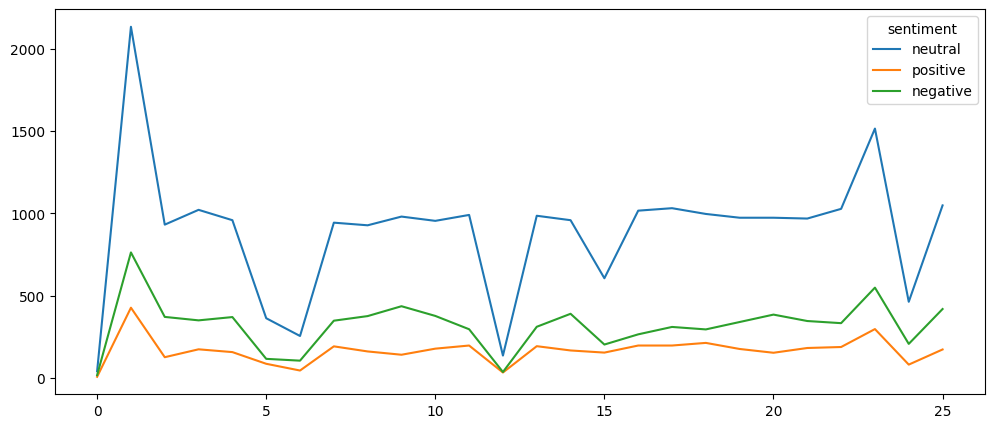

In [47]:
sentiment_per_day[['neutral','positive', 'negative']].plot(figsize=(12,5))

Di sini, dicoba digunakan regresi linear untuk memprediksi nilai pada masa depan atau beberapa hari setelah data terakhir. Sebenarnya, prediksi menggunakan linear regresi bukanlah cara terbaik untuk memprediksi nilai pada data ini. Akan tetapi, karena keterbatasan data yang hanya memiliki satu atribut (jumlah tweet) dan data yang hanya berkisar satu bulan, maka cara yang sedikit efektif adalah regresi linear.

In [81]:
from sklearn.linear_model import LinearRegression

In [88]:
X_neutral = np.arange(len(sentiment_per_day)).reshape(-1, 1)
y_neutral = sentiment_per_day['neutral']

X_negative = np.arange(len(sentiment_per_day)).reshape(-1, 1)
y_negative = sentiment_per_day['negative']

X_positive = np.arange(len(sentiment_per_day)).reshape(-1, 1)
y_positive = sentiment_per_day['positive']

Kode di atas digunakan untuk mempersiapkan data yang akan digunakan dalam analisis sentimen berdasarkan kategori sentimen, seperti 'neutral', 'negative', dan 'positive'. Di bawah ini adalah penjelasan kode tersebut:

1. `X_neutral = np.arange(len(sentiment_per_day)).reshape(-1, 1)`: 
   - Baris ini menciptakan array NumPy (numpy array) yang disebut `X_neutral`.
   - `len(sentiment_per_day)` digunakan untuk menghitung jumlah baris (data berdasarkan tanggal) dalam DataFrame `sentiment_per_day`.
   - `np.arange(len(sentiment_per_day))` menciptakan array yang berisi urutan angka dari 0 hingga jumlah baris `sentiment_per_day - 1`.
   - `.reshape(-1, 1)` digunakan untuk mengubah bentuk array sehingga menjadi matriks dengan satu kolom. Ini sering digunakan saat kita ingin mempersiapkan data yang akan digunakan dalam regresi linier sederhana atau analisis serupa.

2. `y_neutral = sentiment_per_day['neutral']`:
   - Baris ini mengambil kolom 'neutral' dari DataFrame `sentiment_per_day` dan menyimpannya dalam variabel `y_neutral`. 
   - Kolom 'neutral' mungkin berisi jumlah sentimen netral berdasarkan tanggal.

3. `X_negative = np.arange(len(sentiment_per_day)).reshape(-1, 1)`:
   - Baris ini mirip dengan yang pertama, tetapi digunakan untuk mempersiapkan data yang berkaitan dengan sentimen negatif. 
   - Ini menciptakan array `X_negative` yang merupakan urutan angka dari 0 hingga jumlah baris `sentiment_per_day`, dan diubah menjadi matriks dengan satu kolom.

4. `y_negative = sentiment_per_day['negative']`:
   - Baris ini mengambil kolom 'negative' dari DataFrame `sentiment_per_day` dan menyimpannya dalam variabel `y_negative`.
   - Kolom 'negative' mungkin berisi jumlah sentimen negatif berdasarkan tanggal.

5. `X_positive = np.arange(len(sentiment_per_day)).reshape(-1, 1)`:
   - Baris ini serupa dengan yang pertama dan kedua, tetapi digunakan untuk mempersiapkan data yang berkaitan dengan sentimen positif.

6. `y_positive = sentiment_per_day['positive']`:
   - Baris ini mengambil kolom 'positive' dari DataFrame `sentiment_per_day` dan menyimpannya dalam variabel `y_positive`.
   - Kolom 'positive' mungkin berisi jumlah sentimen positif berdasarkan tanggal.

Hasil akhirnya adalah tiga set data yang dipersiapkan untuk analisis lebih lanjut: `X_neutral` dan `y_neutral` untuk sentimen netral, `X_negative` dan `y_negative` untuk sentimen negatif, serta `X_positive` dan `y_positive` untuk sentimen positif. Data ini mungkin akan digunakan untuk melakukan regresi linier atau analisis lainnya untuk memahami hubungan antara tanggal dan jumlah sentimen dalam setiap kategori sentimen.

In [89]:
model_neutral = LinearRegression()
model_negative = LinearRegression()
model_positive = LinearRegression()

Kode di atas digunakan untuk menciptakan tiga model regresi linier yang berbeda, masing-masing digunakan untuk melakukan analisis hubungan antara variabel input (X) dan variabel target (y) untuk tiga kategori sentimen yang berbeda: 'neutral', 'negative', dan 'positive'.

In [90]:
model_neutral.fit(X_neutral, y_neutral)
model_negative.fit(X_negative, y_negative)
model_positive.fit(X_positive, y_positive)

LinearRegression()

Kode di atas digunakan untuk melatih atau "fit" model regresi linier pada data yang telah dipersiapkan sebelumnya. Ada tiga model regresi linier yang berbeda yang akan dilatih untuk masing-masing kategori sentimen: 'neutral', 'negative', dan 'positive'. Berikut adalah penjelasan dari kode tersebut:

1. `model_neutral.fit(X_neutral, y_neutral)`:
   - Baris ini menginstruksikan model regresi linier yang disimpan dalam variabel `model_neutral` untuk dilatih (fit) dengan data. 
   - `X_neutral` adalah variabel input yang mewakili tanggal atau data yang berkaitan dengan sentimen netral.
   - `y_neutral` adalah variabel target yang berisi jumlah sentimen netral berdasarkan tanggal.
   - Dengan menggunakan metode `.fit()`, model akan belajar relasi antara tanggal (X_neutral) dan jumlah sentimen netral (y_neutral). Model regresi linier akan mencoba menemukan garis atau fungsi yang meminimalkan kesalahan dalam memprediksi jumlah sentimen netral berdasarkan tanggal.

2. `model_negative.fit(X_negative, y_negative)`:
   - Baris ini mirip dengan yang pertama, tetapi digunakan untuk melatih model regresi linier pada data sentimen negatif.
   - `X_negative` adalah variabel input yang berkaitan dengan sentimen negatif.
   - `y_negative` adalah variabel target yang berisi jumlah sentimen negatif.

3. `model_positive.fit(X_positive, y_positive)`:
   - Baris ini juga mirip dengan yang pertama, tetapi digunakan untuk melatih model regresi linier pada data sentimen positif.
   - `X_positive` adalah variabel input yang berkaitan dengan sentimen positif.
   - `y_positive` adalah variabel target yang berisi jumlah sentimen positif.

Hasil dari kode ini adalah bahwa tiga model regresi linier telah dilatih dengan data yang sesuai untuk masing-masing kategori sentimen. Setelah pelatihan, model-model ini dapat digunakan untuk melakukan prediksi, menganalisis hubungan antara tanggal dan jumlah sentimen, atau tujuan analisis lainnya yang sesuai dengan analisis regresi linier.

In [91]:
future_days = np.arange(len(sentiment_per_day), len(sentiment_per_day) + 7).reshape(-1, 1)

predicted_neutral = model_neutral.predict(future_days)
predicted_negative = model_negative.predict(future_days)
predicted_positive = model_positive.predict(future_days)

Kode di atas digunakan untuk membuat prediksi jumlah sentimen untuk kategori 'neutral', 'negative', dan 'positive' untuk hari-hari di masa depan. Berikut adalah penjelasan dari kode tersebut:

1. `future_days = np.arange(len(sentiment_per_day), len(sentiment_per_day) + 7).reshape(-1, 1)`:
   - Baris ini menciptakan array NumPy yang disebut `future_days`, yang akan digunakan untuk mewakili tanggal-tanggal di masa depan.
   - `len(sentiment_per_day)` digunakan untuk menghitung jumlah baris (data tanggal) dalam DataFrame `sentiment_per_day`.
   - `np.arange(len(sentiment_per_day), len(sentiment_per_day) + 7)` digunakan untuk menciptakan urutan angka yang dimulai dari jumlah tanggal yang ada dalam `sentiment_per_day` dan berlanjut selama tujuh hari ke depan.
   - `.reshape(-1, 1)` digunakan untuk mengubah bentuk array sehingga menjadi matriks dengan satu kolom. Hal ini diperlukan karena model regresi linier memerlukan input yang sesuai dengan bentuk matriks, dan setiap tanggal dianggap sebagai input untuk memprediksi jumlah sentimen.

2. `predicted_neutral = model_neutral.predict(future_days)`:
   - Baris ini menggunakan model regresi linier yang telah dilatih untuk kategori 'neutral' (disimpan dalam `model_neutral`) untuk membuat prediksi jumlah sentimen netral untuk tanggal-tanggal di masa depan.
   - `future_days` adalah input yang digunakan untuk membuat prediksi.
   - Hasil prediksi jumlah sentimen netral disimpan dalam variabel `predicted_neutral`.

3. `predicted_negative = model_negative.predict(future_days)`:
   - Baris ini mirip dengan yang pertama, tetapi digunakan untuk membuat prediksi jumlah sentimen negatif (disimpan dalam `predicted_negative`) untuk tanggal-tanggal di masa depan.

4. `predicted_positive = model_positive.predict(future_days)`:
   - Baris ini juga mirip dengan yang pertama, tetapi digunakan untuk membuat prediksi jumlah sentimen positif (disimpan dalam `predicted_positive`) untuk tanggal-tanggal di masa depan.

Hasil dari kode ini adalah bahwa prediksi jumlah sentimen netral, negatif, dan positif telah dibuat untuk tujuh hari ke depan berdasarkan model regresi linier yang telah dilatih sebelumnya. Hasil prediksi ini dapat digunakan untuk analisis atau perencanaan yang sesuai berdasarkan data sentimen yang telah ada.

Hasil dalam bentuk dataframe adalah sebagai berikut.

In [102]:
predicted_df = pd.DataFrame({'day': future_days.flatten(), 'predicted_neutral': predicted_neutral, 'predicted_negative': predicted_negative, 'predicted_positive': predicted_positive})
predicted_df

,day,predicted_neutral,predicted_negative,predicted_positive
0,26,978.541538,341.332308,184.018462
1,27,984.895043,342.929573,185.412991
2,28,991.248547,344.526838,186.807521
3,29,997.602051,346.124103,188.202051
4,30,1003.955556,347.721368,189.596581
5,31,1010.309060,349.318632,190.991111
6,32,1016.662564,350.915897,192.385641


Menambahkan status predicted ke data hasil prediksi.

In [103]:
predicted_df['status'] = 'predicted'
predicted_df

,day,predicted_neutral,predicted_negative,predicted_positive,status
0,26,978.541538,341.332308,184.018462,predicted
1,27,984.895043,342.929573,185.412991,predicted
2,28,991.248547,344.526838,186.807521,predicted
3,29,997.602051,346.124103,188.202051,predicted
4,30,1003.955556,347.721368,189.596581,predicted
5,31,1010.309060,349.318632,190.991111,predicted
6,32,1016.662564,350.915897,192.385641,predicted


Mengubah day menjadi dalam format date melanjutkan date dari data sebelum prediksi.

In [104]:
# Convert the day column in "sentiment_per_day" to datetime
sentiment_per_day['day'] = pd.to_datetime(sentiment_per_day['day'])

# Get the last day in "sentiment_per_day"
last_day = sentiment_per_day['day'].iloc[-1]

# Replace day values in "predicted_df" with dates starting from the day after the last day
predicted_df['day'] = pd.date_range(start=last_day + pd.DateOffset(1), periods=len(predicted_df))
predicted_df

,day,predicted_neutral,predicted_negative,predicted_positive,status
0,2020-08-31,978.541538,341.332308,184.018462,predicted
1,2020-09-01,984.895043,342.929573,185.412991,predicted
2,2020-09-02,991.248547,344.526838,186.807521,predicted
3,2020-09-03,997.602051,346.124103,188.202051,predicted
4,2020-09-04,1003.955556,347.721368,189.596581,predicted
5,2020-09-05,1010.309060,349.318632,190.991111,predicted
6,2020-09-06,1016.662564,350.915897,192.385641,predicted


Menggabungkan data sebelumnya dan data hasil prediksi.

In [105]:
time_series_df = pd.concat([sentiment_per_day, predicted_df], ignore_index=True)

# Fill NaN values in the original columns with the predicted values
time_series_df['neutral'].update(time_series_df.pop('predicted_neutral'))
time_series_df['negative'].update(time_series_df.pop('predicted_negative'))
time_series_df['positive'].update(time_series_df.pop('predicted_positive'))

time_series_df

,day,negative,neutral,positive,status
0,2020-07-24,17.000000,41.000000,7.000000,fixed
1,2020-07-25,763.000000,2135.000000,427.000000,fixed
2,2020-07-26,371.000000,932.000000,126.000000,fixed
3,2020-07-27,350.000000,1022.000000,174.000000,fixed
4,2020-07-28,370.000000,959.000000,157.000000,fixed
5,2020-07-29,116.000000,363.000000,86.000000,fixed
6,2020-07-30,105.000000,255.000000,45.000000,fixed
7,2020-07-31,348.000000,944.000000,192.000000,fixed
8,2020-08-01,376.000000,928.000000,161.000000,fixed
9,2020-08-02,436.000000,981.000000,141.000000,fixed


Visualisasi sederhana antara data yang ada dan predicted value hasil regresi.

In [100]:
import matplotlib.pyplot as plt

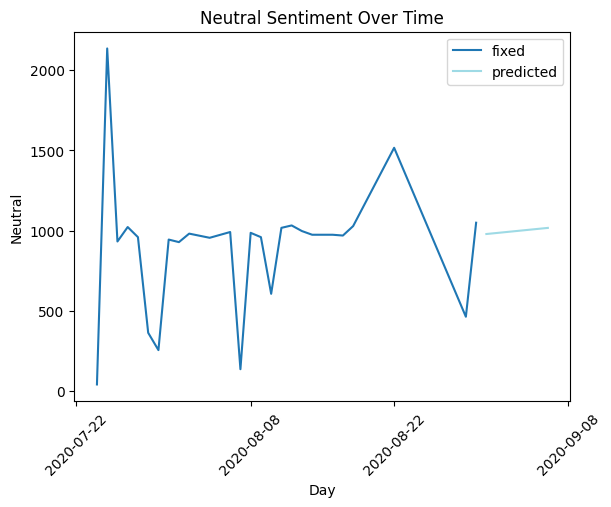

In [101]:
# Create the figure and axis objects
fig, ax = plt.subplots()

# Get the unique status values
status_values = time_series_df['status'].unique()

# Define a colormap for the status
cmap = plt.get_cmap('tab20')

# Create a list of colors for the status
colors = [cmap(i) for i in np.linspace(0, 1, len(status_values))]

for i, status in enumerate(status_values):
    # Filter the DataFrame for the current status
    sub_df = time_series_df[time_series_df['status'] == status]

    # Plot the lines with appropriate color
    ax.plot(sub_df['day'], sub_df['neutral'], label=status, color=colors[i])

# Add a legend
ax.legend()

# Customize the x-axis labels for better readability
ax.set_xticks(ax.get_xticks()[::2])  # Show every second label

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Neutral')
ax.set_title('Neutral Sentiment Over Time')

# Show the plot
plt.show()

### <font color="blue">G. Perform Word Frequency Analysis (Addition)</font>

In [106]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

                                              0.0/152.1 kB ? eta -:--:--
     -------                                 30.7/152.1 kB 1.4 MB/s eta 0:00:01
     -----------------------------------    143.4/152.1 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 152.1/152.1 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: C:\Users\LENOVO\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip


In [107]:
text = random_sample["text_no_stopwords"].to_list()
wordcloud_text = ''.join(text)

Kode tersebut digunakan untuk menggabungkan teks dari kolom 'text_no_stopwords' dalam DataFrame random_sample menjadi satu teks panjang yang akan digunakan untuk membuat word cloud.

Sedangkan kode di bawah ini digunakan untuk membuat dan menampilkan word cloud berdasarkan teks yang telah diambil dari kolom 'text_no_stopwords' dalam DataFrame random_sample. Word cloud adalah representasi visual dari kata-kata dalam teks di mana kata-kata yang lebih sering muncul akan lebih besar dalam tampilan visualnya.

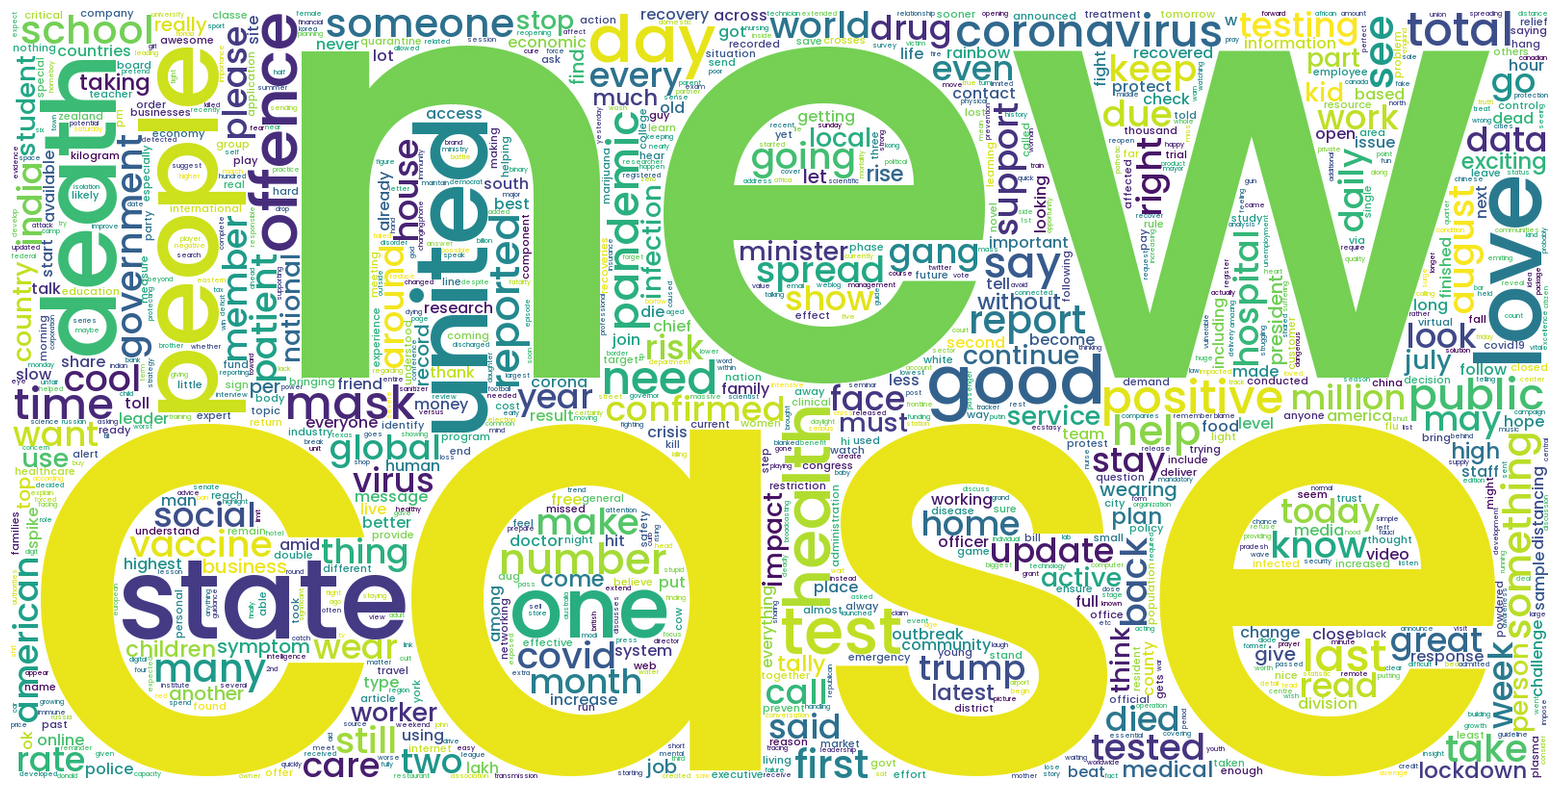

In [108]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      width=1600, height=800,
                        background_color = 'white',
                        font_path="Poppins-Medium.ttf",
                      max_words = 1000,
                      collocations=False).generate(wordcloud_text)

#plot the wordcloud object
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

wordcloud.to_file('all.png')

Kode di bawah ini digunakan untuk menghitung frekuensi kemunculan kata-kata dalam kolom `'text_no_stopwords'` dari DataFrame random_sample. Hasilnya adalah DataFrame baru yang berisi dua kolom: `'Word'` (kata) dan `'Frequency'` (frekuensi kemunculan kata tersebut). 

In [111]:
word_count = random_sample.text_no_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count.columns = ['Word', 'Frequency'] 
word_count

,Word,Frequency
0,cases,2956
1,new,2924
2,people,1806
3,states,1354
4,united,1330
...,...,...
23432,underestimations,1
23433,bagdogra,1
23434,2084,1
23435,speechless,1


Didapatkan bahwa kata-kata yang paling sering keluar adalah cases, new, dan people.

### <font color="blue">H. Import .csv to Perform Visualization in Tableau</font>

Download .csv untuk dilakukan visualisasi dan menampilkan dashboard melalui Tableau.

In [122]:
%pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: C:\Users\LENOVO\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip



                                              0.0/250.0 kB ? eta -:--:--
     ------                                41.0/250.0 kB 960.0 kB/s eta 0:00:01
     -----------------                      112.6/250.0 kB 1.6 MB/s eta 0:00:01
     ---------------------                  143.4/250.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.7 MB/s eta 0:00:00


In [125]:
sentiment_count_df.to_excel('sentiment_count_df.xlsx', index=False)
time_series_df.to_excel('time_series_df.xlsx', index=False)
word_count.to_excel('word_count.xlsx', index=False)